In [24]:
%matplotlib inline
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
import torchvision as vision
import torch
from helper import *

In [25]:
root = '/home/himanshu/cityscape/'
trainset = torchvision.datasets.Cityscapes(root, split = 'train', mode = 'fine', target_type = 'semantic')

In [16]:
image, mask = trainset[0]

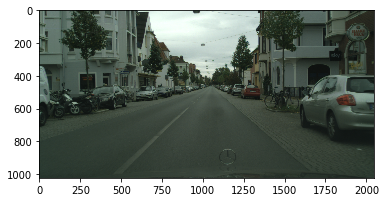

In [17]:
plt.imshow(image)

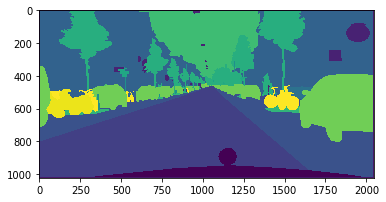

In [18]:
plt.imshow(mask)

In [22]:
image, mask = trainset[0]
mask = np.array(mask)
print(np.unique(mask))

[ 1  3  4  5  7  8  9 11 13 17 19 20 21 22 23 24 26 27 32 33]


In [27]:
class encode_segmap(object) :
    def __init__(self, ignore_index) :
        self.void_labels = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, 29, 30, -1]
        self.valid_labels = [7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
        self.class_map = dict(zip(self.valid_labels, range(19)))
        self.ignore_index = ignore_index
    def __call__(self, mask) : 
        mask = np.array(mask)
        for voidc in self.void_labels :
            mask[mask == voidc] = self.ignore_index
        for validc in self.valid_labels :
            mask[mask == validc] = self.class_map[validc]
        return mask

In [32]:
target_transform = vision.transforms.Compose([vision.transforms.Resize((480, 640)), encode_segmap(ignore_index = 250)])
tfsm = vision.transforms.Compose([vision.transforms.Resize((480, 640)), vision.transforms.ToTensor()])
dataset = vision.datasets.Cityscapes(root=root, target_type='semantic', mode='fine', transform = tfsm, target_transform = target_transform)

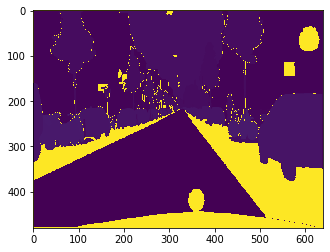

In [35]:
image, mask = dataset[0]
plt.imshow(mask)